<div >
<img src = "../banner.png" />
</div>

# Análisis de sentimientos

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaciomsarmiento/RecomSystemsLectures/blob/main/L07_sentimientos/L07_sentiment_analisis_clase.ipynb)

El análisis de sentimientos es un campo interdisciplinario que involucra matemáticas, estadística, informática y lingüística, entre otros. A continuación, te explico brevemente la matemática detrás del análisis de sentimientos:

En primer lugar, el análisis de sentimientos utiliza modelos matemáticos para representar el tono emocional de un texto. Por ejemplo, un modelo comúnmente utilizado es el modelo de bolsa de palabras (bag-of-words), que representa el texto como una colección de palabras, ignorando el orden en que aparecen. Este modelo se utiliza para calcular la frecuencia de cada palabra en el texto y, a partir de ahí, determinar su polaridad emocional.

Para determinar la polaridad emocional de una palabra, se utilizan diccionarios de palabras que han sido previamente clasificadas como positivas, negativas o neutrales. Estos diccionarios se construyen mediante el análisis de grandes conjuntos de datos, donde se etiquetan las palabras según su tono emocional. Palabras como:

* Bueno.
* Excelente. 
* Malo.
* pésimo.

Dan polaridad a nuestro estudio,

Una vez que se ha calculado la polaridad emocional de cada palabra en el texto, se utiliza un algoritmo de clasificación para asignar una polaridad emocional al texto en su conjunto. Los algoritmos más comunes son el análisis de sentimiento basado en reglas y el análisis de sentimiento basado en aprendizaje automático.

En términos de aplicaciones reales, el análisis de sentimientos se utiliza en una amplia variedad de campos y situaciones. Algunas aplicaciones comunes son:

* Medición de la satisfacción del cliente: las empresas pueden utilizar el análisis de sentimientos para medir la satisfacción del cliente en las redes sociales o en los comentarios de los clientes en línea.

* Análisis de la opinión pública: los gobiernos y los grupos de interés pueden utilizar el análisis de sentimientos para medir la opinión pública sobre temas políticos o sociales.

* Análisis de la percepción de la marca: las empresas pueden utilizar el análisis de sentimientos para medir la percepción de la marca entre los consumidores.
* Análisis de la efectividad publicitaria: las empresas pueden utilizar el análisis de sentimientos para medir la efectividad de sus campañas publicitarias.

En resumen, el análisis de sentimientos es una técnica poderosa que se utiliza para medir el tono emocional de un texto y comprender mejor las opiniones y actitudes de las personas. Utiliza modelos matemáticos y algoritmos de clasificación para lograr esto, y tiene aplicaciones en una amplia variedad de campos y situaciones.

In [91]:
# required libraries
import pandas as pd
#import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [92]:
# load dataset 
data = pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/RecomSystemsLectures/main/L07_sentimientos/data/Amazon.csv', index_col="Unnamed: 0")

In [93]:
data.head()

,id,reviews.text,reviews.rating,reviews.text_esp
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5.0,Esta es una tableta muy agradable para mi novi...
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5.0,Me encanta esta tableta. Fácil de usar. Y el p...
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5.0,Precio asequible calidad increíble Me encanta ...
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5.0,Compré esto después de hablar con un represent...
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5.0,Compré esta tableta para mi hijo de 2 años y m...


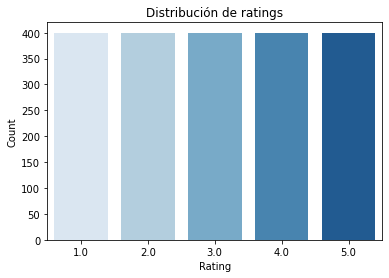

In [94]:
# distribution de los raitings
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribución de ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [95]:
# map ratings 1, 2, 3 a 0 (NEGATIVE) y 4, 5 a 1 (POSITIVE)

sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}

# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

## Map es una funcion util y puede usarse como alternativa a los fors.
# list(map(funcion, lista))
#numbers = [10, 15, 21, 33, 42, 55]
#mapped_numbers = list(map(lambda x: x * 2 + 3, numbers))

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5.0,Esta es una tableta muy agradable para mi novi...,1,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5.0,Me encanta esta tableta. Fácil de usar. Y el p...,1,POSITIVE
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5.0,Precio asequible calidad increíble Me encanta ...,1,POSITIVE
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5.0,Compré esto después de hablar con un represent...,1,POSITIVE
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5.0,Compré esta tableta para mi hijo de 2 años y m...,1,POSITIVE


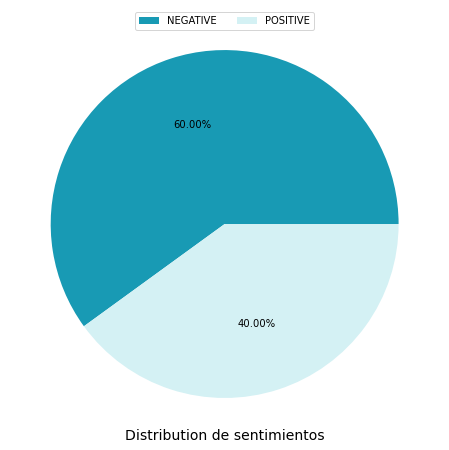

In [96]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['NEGATIVE','POSITIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution de sentimientos', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [97]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter


In [98]:
# Eliminamos stopwords
from nltk.corpus import stopwords
import unidecode
nltk.download('stopwords')
stopwords = set(stopwords.words("spanish"))

# Creamos un diccionario de stopwords en español
stopwords = [unidecode.unidecode(i) for i in stopwords]
stopwords = set(stopwords)
stop_words=list(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jsegura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
## Limpieza de texto.
def clean_text(text:str)-> str:
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text) 
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)

    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords]
    return ' '.join(a)

In [100]:
data

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment_score,sentiment
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5.0,Esta es una tableta muy agradable para mi novi...,1,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5.0,Me encanta esta tableta. Fácil de usar. Y el p...,1,POSITIVE
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5.0,Precio asequible calidad increíble Me encanta ...,1,POSITIVE
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5.0,Compré esto después de hablar con un represent...,1,POSITIVE
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5.0,Compré esta tableta para mi hijo de 2 años y m...,1,POSITIVE
...,...,...,...,...,...,...
1995,AVpfl8cLLJeJML43AE3S,I'm returning it because a new version is comi...,1.0,Lo devuelvo porque viene una nueva versión,0,NEGATIVE
1996,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,1.0,Me sorprendió descubrir que no venía con ningú...,0,NEGATIVE
1997,AVpidLjVilAPnD_xEVpI,Expected it to be a bigger version of the HDX ...,1.0,Esperaba que fuera una versión más grande del ...,0,NEGATIVE
1998,AV1YE_muvKc47QAVgpwE,Never bought this item at all. So i guess you ...,1.0,Nunca compré este artículo en absoluto. Así qu...,0,NEGATIVE


In [101]:
# remove stopwords
data['text'] = data['reviews.text_esp'].apply(clean_text)
data['text']=data['text'].apply(stopword)

In [102]:
data['text']=data['text'].str.replace("á","a").str.replace("é","e").str.replace("í","i").str.replace("ó","o").str.replace("ú","u")

In [103]:
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')

def stemmer(texto):
    return(spanish_stemmer.stem(texto))
data['text']=data['text'].apply(stemmer)

In [104]:
data['text'].apply(stemmer)

0                      tableta agradable novia nunca habi
1               encanta tableta facil usar precio correct
2       precio asequible calidad increible encanta tab...
3       compre despues hablar representante ventas tig...
4       compre tableta hijo años medio perfecta juegos...
                              ...                        
1995                         devuelvo viene nueva version
1996    sorprendio descubrir venia ningun tipo cable c...
1997    esperaba version mas grande hdx correo electro...
1998    nunca compre articulo absoluto asi supongo deb...
1999    tenia ipad viejo dejo funcionar decidi ir tabl...
Name: text, Length: 2000, dtype: object

In [105]:
# Graficos de palbras.

# todas las palabras
all_words = pd.Series(' '.join(data['text']).split())

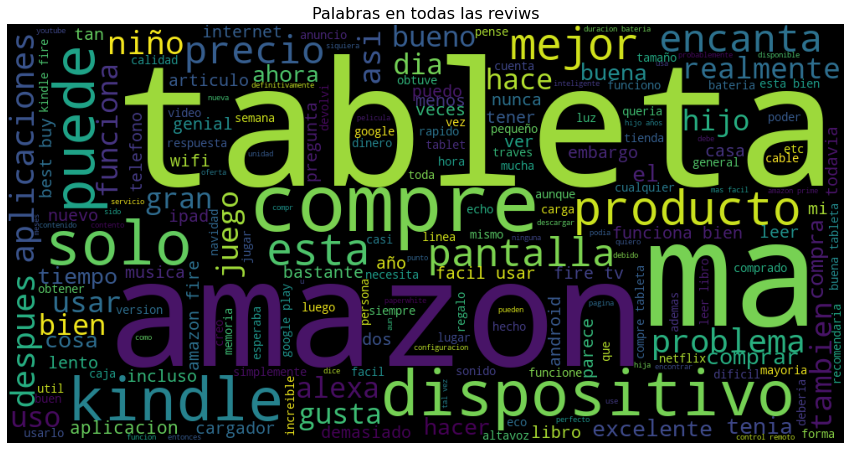

In [106]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras en todas las reviws", size=16)

plt.axis("off")
plt.show()

In [107]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['text']).split())

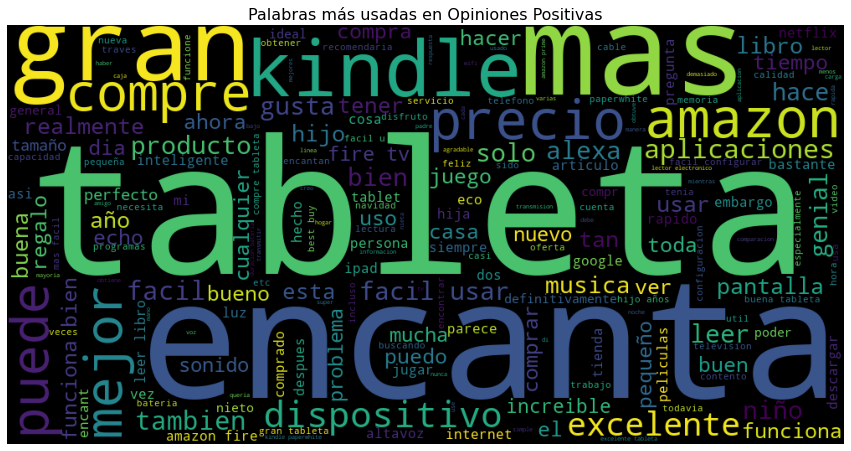

In [108]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Positivas", size=16)

plt.axis("off")
plt.show()

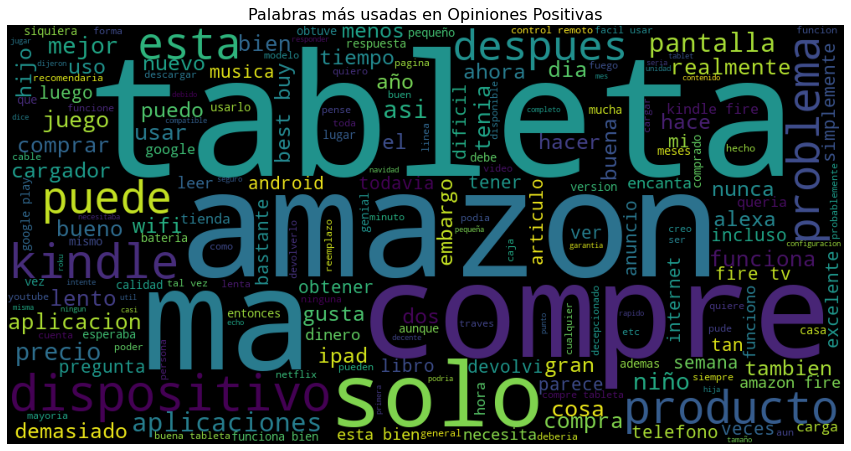

In [109]:
# get words used positive reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['text']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Positivas", size=16)

plt.axis("off")
plt.show()

In [110]:
from sentiment_analysis_spanish import sentiment_analysis
def analysis_sentimientos(x):
    sa=sentiment_analysis.SentimentAnalysisSpanish()
    return(sa.sentiment(x))

In [111]:
## Seleccionar una muestra
data5 = data[data['reviews.rating']==5].sample(20,random_state=43)
data4 = data[data['reviews.rating']==4].sample(20,random_state=43)
data3 = data[data['reviews.rating']==3].sample(20,random_state=43)
data2 = data[data['reviews.rating']==2].sample(20,random_state=43)
data1 = data[data['reviews.rating']==1].sample(20,random_state=43)

data2 = pd.concat([data5,data4,data3,data2,data1])

In [112]:
data2.reset_index(drop=True, inplace=True)

In [ ]:
#data["score"]=data["text"].apply(analysis_sentimientos)
data2["score"]=data2["text"].apply(analysis_sentimientos)

In [ ]:
data2.iloc[23]["reviews.text_esp"]

In [ ]:
data2["score"]

## Ejemplo analisis de sentimiento 2 BOW (EN)

"Bag of Words" (BoW) es un método utilizado en el procesamiento de lenguaje natural para representar el texto como una matriz de conteo de palabras. En el análisis de sentimientos, el BoW se utiliza para extraer características del texto que luego se utilizan para clasificarlo como positivo o negativo.

La idea detrás de BoW es tratar cada documento (en este caso, una reseña o comentario) como una "bolsa" de palabras, ignorando el orden en que aparecen en el texto y solo contando su frecuencia. El proceso implica los siguientes pasos:

Tokenización: el texto se divide en palabras individuales, eliminando la puntuación y los caracteres especiales.

Creación de vocabulario: se crea una lista de todas las palabras únicas en todo el corpus de texto.

Vectorización: se crea una matriz donde cada fila representa un documento y cada columna representa una palabra única. El valor en cada celda representa la frecuencia de esa palabra en ese documento.

Normalización: las frecuencias se ajustan para tener en cuenta la longitud del documento y la frecuencia de la palabra en todo el corpus.

Una vez que se ha creado la matriz de BoW, se puede usar para entrenar un modelo de clasificación, como la regresión logística, que puede predecir si una reseña o comentario es positivo o negativo en función de las palabras que contiene. El modelo se entrena utilizando un conjunto de datos de entrenamiento etiquetado que contiene reseñas o comentarios positivos y negativos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

In [ ]:
def limpiar(text):
    text = text.lower() 
    text=text.strip() 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    return text

In [ ]:
data2["reviews.text"]=data2["reviews.text"].apply(limpiar)
data2["reviews.text"]=data2["reviews.text"].apply(clean_text)

In [ ]:
##pip install nltk

In [ ]:
import nltk

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
stopwords.extend(['five'])

In [ ]:
def stopword(string):
    a= [i for i in string.split() if i not in stopwords]
    return ' '.join(a)

In [ ]:
data2["reviews.text.ing"]=data2["reviews.text"].apply(stopword)

In [ ]:
data2.iloc[1][["reviews.text","reviews.text.ing"]]

### **Count Vector**

Count Vector es una técnica de vectorización de texto que se utiliza para convertir el texto en una matriz numérica de conteo de palabras. Esta técnica forma parte del proceso de Bag of Words (BoW) que se utiliza en el análisis de texto.

La técnica de Count Vector implica los siguientes pasos:

* Tokenización: el texto se divide en palabras individuales.

* Creación de vocabulario: se crea una lista de todas las palabras únicas en todo el corpus de texto.

* Conteo de palabras: se cuenta la frecuencia de cada palabra en cada documento.

* Vectorización: se crea una matriz donde cada fila representa un documento y cada columna representa una palabra única. El valor en cada celda representa el número de veces que aparece esa palabra en ese documento.

El resultado final es una matriz de números enteros que representa el conteo de palabras en cada documento. Esta matriz se puede utilizar para entrenar un modelo de aprendizaje automático para el análisis de texto, como la regresión logística o el árbol de decisión.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import pandas

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bowmatrix = vectorizer.fit_transform(data2["reviews.text.ing"])

In [ ]:
bowmatrix.toarray().shape

In [ ]:
print(bowmatrix.toarray())

## **Stemming**

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()

In [ ]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

data2["reviews.text.ing"] = data2["reviews.text.ing"].apply(stem_sentences)

In [ ]:
data2["reviews.text"]

In [ ]:
data2["reviews.text.ing"]

## **Dictionary based sentiment analysis**

In [ ]:
nltk.download('opinion_lexicon')

In [ ]:
from nltk.corpus import opinion_lexicon

In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
neg_list

In [ ]:
pos_list

In [ ]:
def sentiment_dictionary(x):
    pos=0
    neg=0
    for i in x.split():
        if i in pos_list:
            pos+=1
        if i in neg_list:
            neg+=1
    la={}
    la['positive']=(pos/len(x.split()))*100
    try:
        la['negative']=(neg/len(x.split()))*100
    except:la['negative']=0
    return la

In [ ]:
data2["reviews.text.ing"]

In [ ]:
sentiment_dictionary(data2["reviews.text.ing"][17])

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(data2["reviews.text.ing"][17])

### Ejemplo corto

In [ ]:
### Ejemplos de palabras: 

text_1="I am sure that is the reason why education is so important."
r1=sia.polarity_scores(text_1)
print(text_1)
print(r1)
print(" ")
text_2="When you are truly interested in something, you never stop learning."
r2=sia.polarity_scores(text_2)
print(text_2)
print(r2)
print(" ")
text_3="Later, do not stop to sharing knowledge with others."
r3=sia.polarity_scores(text_3)
print(text_3)
print(r3)

In [ ]:
def polarity_neg(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[0])

def polarity_neu(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[1])

def polarity_pos(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[2])

def polarity_compound(texto):
    a=sia.polarity_scores(texto)
    a=list(a.values())
    return(a[3])

data2["neg"]=data2["reviews.text.ing"].apply(polarity_neg)
data2["neu"]=data2["reviews.text.ing"].apply(polarity_neu)
data2["pos"]=data2["reviews.text.ing"].apply(polarity_pos)
data2["compaund"]=data2["reviews.text.ing"].apply(polarity_compound)


In [ ]:
# Forma mas eficiente de ralizar el codigo anterior
"""
def get_polarity_scores(text, column):
    scores = sia.polarity_scores(text)
    return {
        f"{column}_neg": scores["neg"],
        f"{column}_neu": scores["neu"],
        f"{column}_pos": scores["pos"],
        f"{column}_compound": scores["compound"]
    }

data2 = data2.join(data2["reviews.text.ing"].apply(lambda text: get_polarity_scores(text, "reviews.text.ing")).apply(pd.Series)
)
"""

In [ ]:
data2.head()

In [ ]:
data2["sentiment2"]=""
for i in range(0, len(data2)):
    
    if data2.compaund[i] > 0.1:
        data2["sentiment2"][i] = "POSITIVE"
    elif data2.compaund[i]  < 0:
        data2["sentiment2"][i] ="NEGATIVE"
    else:
        data2["sentiment2"][i] ="NEUTRAL"

In [ ]:
data2['sentiment2'].value_counts()

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE',"NEUTRAL",'NEGATIVE']
colors = ['#189AB4', '#D4F1F4','#4682B4']
plt.pie(data2['sentiment2'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution de sentimientos', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
# get words used positive reivews 
negativeWords = pd.Series(' '.join(data2[data2['sentiment2']=='NEGATIVE']["reviews.text.ing"]).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Palabras más usadas en Opiniones Negativas", size=16)

plt.axis("off")
plt.show()

#### *Conclusion 1*

* Los modelos de bag of words son muy buenos a la hora de identificar textos de polaridades claras pero le cuesta mucho cuando los textos presentan polaridades inconcinas.

* para esto se utilizan modelos mas poderosos como transformers, modelos de aprendizaje supervisado y algunas aplicaciones de aprendizaje no supervisado.